In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation,linear_model
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [4]:
# Loading the Data
df = pd.read_csv("Hitters.csv")

In [5]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### Data set description

**Variable** | **__ Description__** |** Type**
---|---|---
AtBat |Number of times at bat in 1986|Integer
Hits|Number of hits in 1986|Integer
HmRun |Number of home runs|Integer
RBI|Number of runs batted|Integer
Walks|Number of walks in 1986|Integer
Years|Number of years in the major leagues|Integer
CAtBat |Number of times at bat during his career |Integer
CHits |Number of hits during his career |Integer
CHmRun |Number of home runs during his career |Integer
CRuns |Number of runs during his career |Integer
CRBI |Number of runs batted in during his career |Integer
CWalks |Number of walks during his career League|Integer
League|A factor with levels A and N indicating player’s league |Qualitiative
Division|A factor with levels E and W indicating player’s division at the end of 1986|Qualitative
PutOuts |Number of put outs|Integer
Assists |Number of assists|Integer
Errors |Number of Errors|Integer
Salary |1987 Salary|Integer
NewLeague |A factor with levels A and N indicating player’s league|Qualitative



- n (number of records =322
- p (Columns = 20)
- Dependent varaiable - Salary

#### Problem Description - Predict Salary of players based on the 19 dependant variables



In [6]:
# 3 of the columns - League ,Division and NewLeague are categorical with non numeric labels
#Using label encoder to transform string categorical features into numeric
le = preprocessing.LabelEncoder()
temp = le.fit_transform(df.League)

le_1 = le = preprocessing.LabelEncoder()
temp_Division = le.fit_transform(df.Division)

le_2 = le = preprocessing.LabelEncoder()
temp_NewLeague = le.fit_transform(df.NewLeague)


df.League = temp
df.Division = temp_Division
df.NewLeague = temp_NewLeague


In [7]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,NaN,1
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,2
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,2
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,2


In [8]:
# Checking for Null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null int64
Division     322 non-null int64
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null int64
dtypes: float64(1), int64(19)
memory usage: 50.4 KB


In [9]:
# The response variable has NAN values for some items ,dropping the observations with NAN values
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null int64
Division     263 non-null int64
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null int64
dtypes: float64(1), int64(19)
memory usage: 43.1 KB


### Exploratory Data Ananlysis

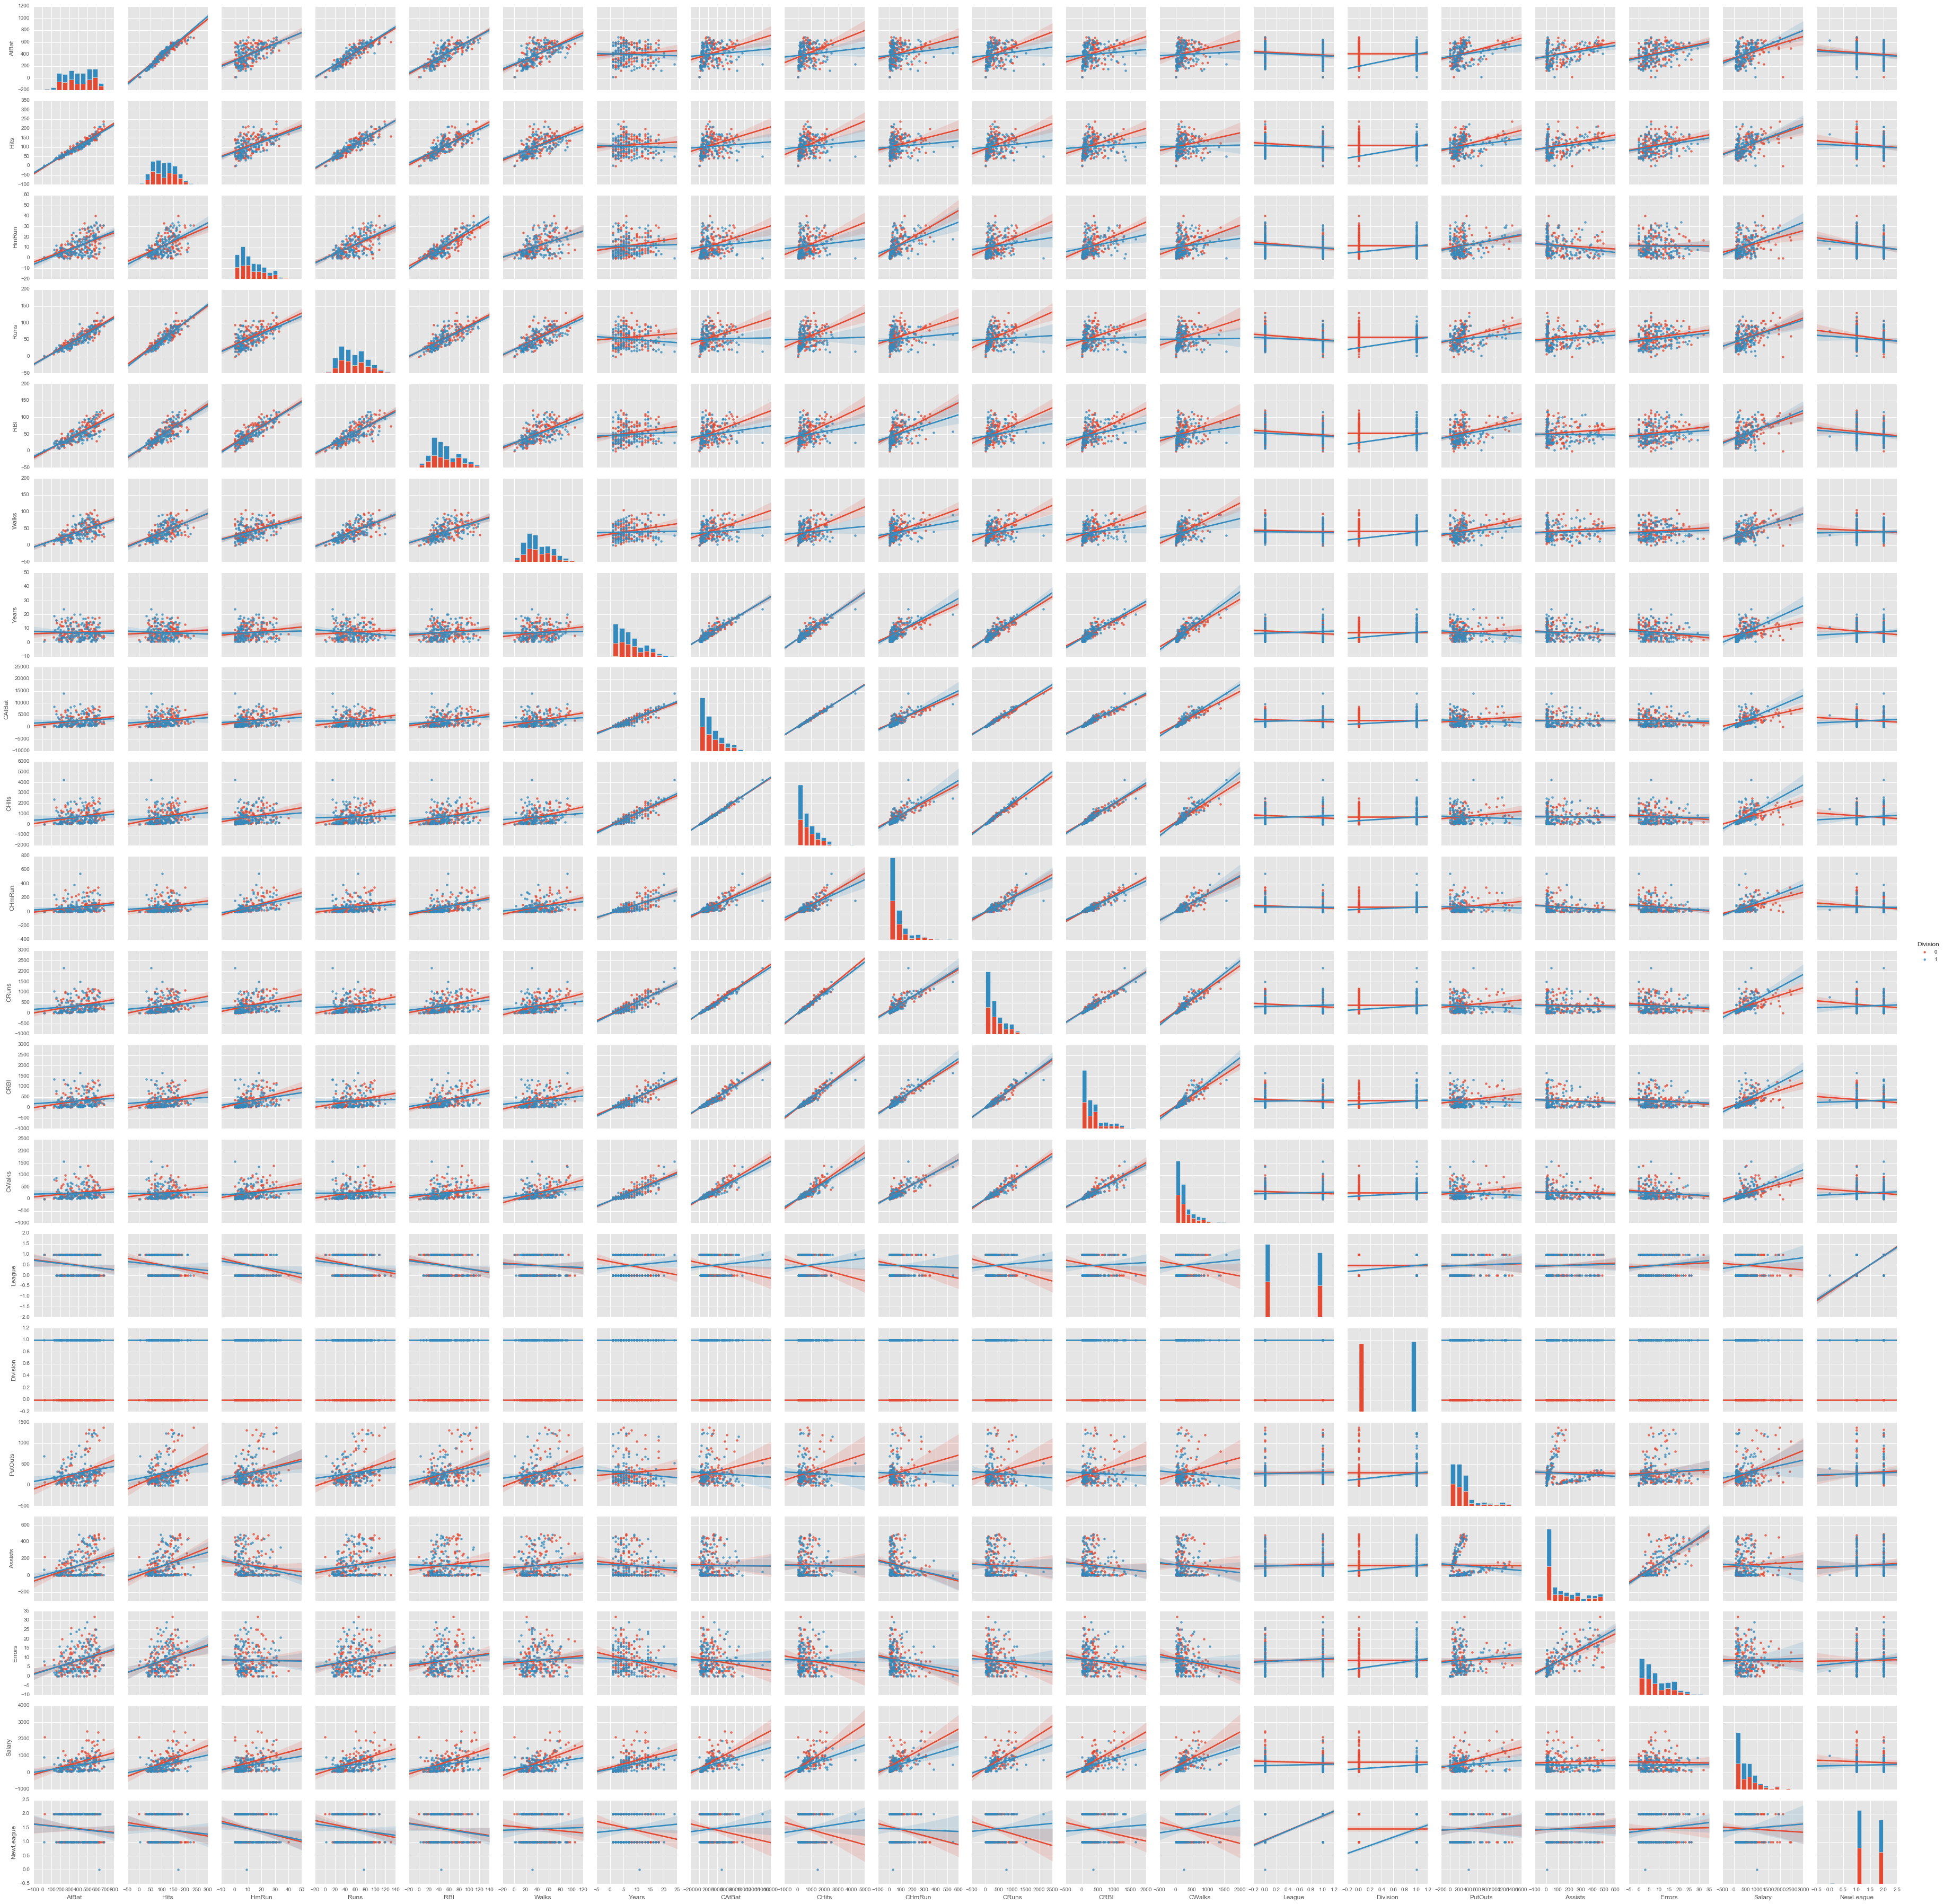

In [10]:
sns.pairplot(data = df , kind = 'reg' , hue = 'Division')

### Observations:
- The regression plot between Salary and Assist and Salary and Error is approx a horizontal line indicating that there is little relationship between these 2 variables


In [11]:
# Train Test split
X = df.drop(['Salary'],axis =1)
y = df.Salary
train_X , test_X, train_y,test_y = cross_validation.train_test_split(X,y,test_size=.2 , random_state=0)

In [12]:
alpha = np.linspace(10,-2,100)**10 # This is a regularization parameter
# defining a data frame to hold values for the result
df_eval = pd.DataFrame({'alpha':np.nan,'train_score':np.nan,'cv_score':np.nan,'coeff':np.nan},index=[0])
# creating a new Data frame to hold the values of coefficients
df_coeff = pd.DataFrame({'Lambda':np.nan},index=[0])

In [15]:
for i in range(0,len(alpha)):
    coeff_list = [] # empty list to hold the values of coefficients generated
    lasso_model = linear_model.Lasso(alpha=alpha[i],normalize=True,max_iter=100000).fit(train_X,train_y)
   
    # populating the list for coefficients
    for j in range(0,len(train_X.columns)):
        coeff_list.append(lasso_model.coef_[j])
        df_coeff.loc[i ,'Lambda'] = alpha[i]
        df_coeff.loc[i ,train_X.columns[j]] = lasso_model.coef_[j]
        
    train_score = lasso_model.score(train_X,train_y)
    cv_score = cross_validation.cross_val_score(lasso_model,train_X,train_y,cv=10).mean()
    
    # populating the Data Frame:
    df_eval.loc[i ,'train_score'] = train_score
    df_eval.loc[i ,'cv_score'] = cv_score
    df_eval.loc[i ,'alpha'] = alpha[i]
    df_eval.loc[i , 'coeff'] = " ".join(str(x) for x in coeff_list)
    
 
    
    
    

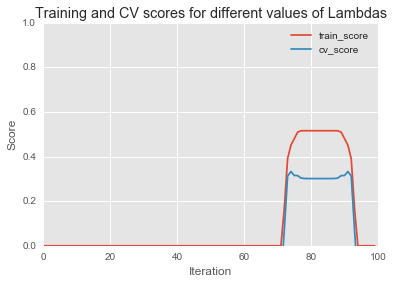

In [16]:
plt.plot(df_eval.index,df_eval.train_score,label='train_score')
plt.plot(df_eval.index,df_eval.cv_score,label='cv_score')
plt.ylim([0,1])
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Training and CV scores for different values of Lambdas')

In [17]:
# Finding the values for alpha that gives the maximum CV score
df_eval.loc[(df_eval.cv_score==df_eval.cv_score.max())]
df_coeff.ix[74]

Lambda        1.347875
AtBat         0.000000
Hits          2.028666
HmRun         0.751034
Runs          0.000000
RBI           0.000000
Walks         2.674344
Years         0.000000
CAtBat        0.000000
CHits         0.129431
CHmRun        0.000000
CRuns         0.107831
CRBI          0.183124
CWalks        0.000000
League        0.000000
Division    -86.005860
PutOuts       0.111210
Assists      -0.000000
Errors       -0.427766
NewLeague     0.000000
Name: 74, dtype: float64

In [18]:
df_coeff.columns

Index([u'Lambda', u'AtBat', u'Hits', u'HmRun', u'Runs', u'RBI', u'Walks',
       u'Years', u'CAtBat', u'CHits', u'CHmRun', u'CRuns', u'CRBI', u'CWalks',
       u'League', u'Division', u'PutOuts', u'Assists', u'Errors',
       u'NewLeague'],
      dtype='object')

In [19]:
df_coeff.describe()

,Lambda,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.010099e+08,-0.263880,1.099356,1.487208,-0.199994,-0.347659,1.178203,0.639468,-0.017440,0.046641,-0.069458,0.145208,0.095940,-0.122023,6.867569,-20.071735,0.032617,0.063732,-0.888749,-1.771336
std,1.961019e+09,0.633207,2.381251,3.601837,0.547044,0.909565,2.545656,1.760463,0.047665,0.108627,0.191686,0.324949,0.218123,0.293643,16.328740,43.131387,0.070378,0.154217,2.045533,4.838567
min,6.685910e-13,-1.832282,0.000000,0.000000,-1.748675,-2.875297,0.000000,0.000000,-0.151855,0.000000,-0.626578,0.000000,0.000000,-0.857767,0.000000,-114.994382,0.000000,0.000000,-5.876191,-15.379906
25%,6.376181e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
50%,1.059420e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
75%,2.832068e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
max,1.000000e+10,0.000000,6.956011,11.157064,0.000000,0.000000,7.370726,5.726613,0.000000,0.332702,0.000000,0.987331,0.682988,0.000000,49.013008,-0.000000,0.196057,0.460296,-0.000000,0.000000


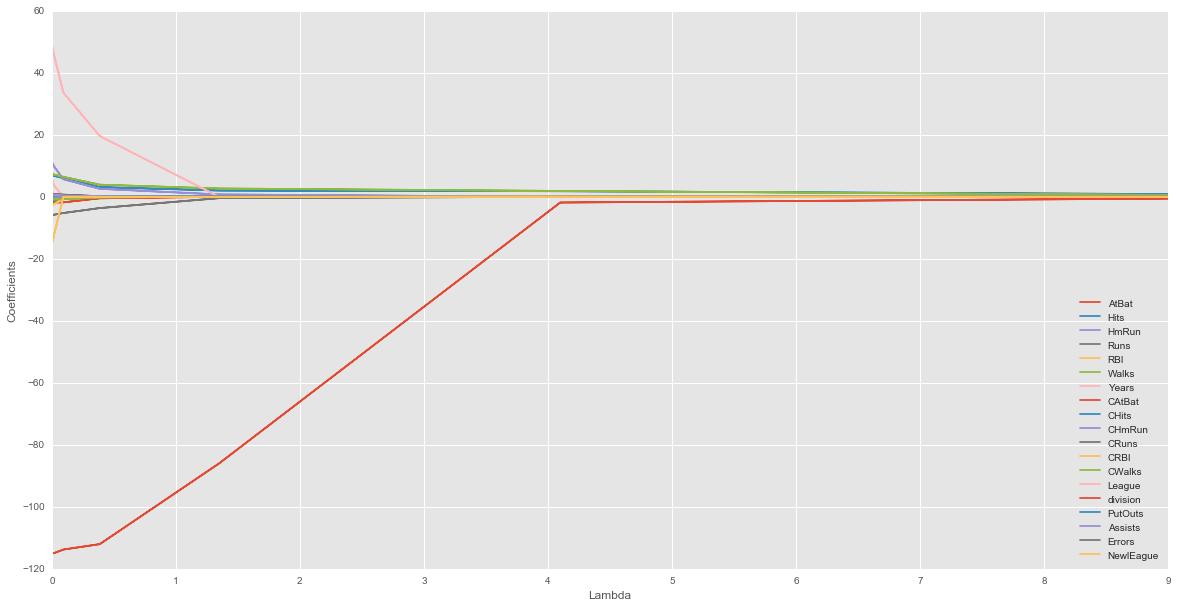

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df_coeff.Lambda , df_coeff.AtBat,label='AtBat')
plt.plot(df_coeff.Lambda , df_coeff.Hits,label='Hits')
plt.plot(df_coeff.Lambda , df_coeff.HmRun,label='HmRun')
plt.plot(df_coeff.Lambda , df_coeff.Runs,label='Runs')
plt.plot(df_coeff.Lambda , df_coeff.RBI,label='RBI')
plt.plot(df_coeff.Lambda , df_coeff.Walks,label='Walks')
plt.plot(df_coeff.Lambda , df_coeff.Years,label='Years')
plt.plot(df_coeff.Lambda , df_coeff.CAtBat,label='CAtBat')
plt.plot(df_coeff.Lambda , df_coeff.CHits,label='CHits')
plt.plot(df_coeff.Lambda , df_coeff.CHmRun,label='CHmRun')
plt.plot(df_coeff.Lambda , df_coeff.CRuns,label='CRuns')
plt.plot(df_coeff.Lambda , df_coeff.CRBI,label='CRBI')
plt.plot(df_coeff.Lambda , df_coeff.CWalks,label='CWalks')
plt.plot(df_coeff.Lambda , df_coeff.League,label='League')
plt.plot(df_coeff.Lambda , df_coeff.Division,label='division')
plt.plot(df_coeff.Lambda , df_coeff.PutOuts,label='PutOuts')
plt.plot(df_coeff.Lambda , df_coeff.Assists,label='Assists')
plt.plot(df_coeff.Lambda , df_coeff.Errors,label='Errors')
plt.plot(df_coeff.Lambda , df_coeff.NewLeague,label='NewlEague')
#plt.ylim([-150,50])
plt.xlim([0,9])
plt.legend(loc='best')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()



## Conclusion

In [25]:
# Finding the values for alpha that gives the maximum CV score
df_eval.loc[(df_eval.cv_score==df_eval.cv_score.max())]


,alpha,coeff,cv_score,train_score
91,1.347875,0.0 2.02866617141 0.751034197524 0.0 0.0 2.674...,0.332979,0.451008


In [26]:
# The Best values for Coefficients are :
df_coeff.ix[91]

Lambda        1.347875
AtBat         0.000000
Hits          2.028666
HmRun         0.751034
Runs          0.000000
RBI           0.000000
Walks         2.674344
Years         0.000000
CAtBat        0.000000
CHits         0.129431
CHmRun        0.000000
CRuns         0.107831
CRBI          0.183124
CWalks        0.000000
League        0.000000
Division    -86.005860
PutOuts       0.111210
Assists      -0.000000
Errors       -0.427766
NewLeague     0.000000
Name: 91, dtype: float64

#### Final Notes:
- As expected and evident from the graph , the coefficient estimates tends to 0 as Lambda approaches infinity
- The Lasso regression shrinks the coefficient estimates towards 0, and has also made some of them exactly ZERO


